<a href="https://colab.research.google.com/github/BalkeesRekik/DS2002/blob/main/CSV_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0 Rk         Player Class Pos          School   G   MP  TRB AST STL  ... TOV  \
1  1   Amaree Abram    SO   G    Georgia Tech  10  108   17  11   1  ...   9   
2  2   Sola Adebisi    FR   F   Florida State   7    9    1   1   0  ...   1   
3  3  Prince Aligbe    SO   F  Boston College  35  651  119  21  15  ...  30   
4  4     Abe Atiyeh    SR   G  Boston College   4    6    0   0   0  ...   1   
5  5    Zack Austin    JR   F      Pittsburgh  33  746  137  29  32  ...  13   

0  PF  PTS    FG%    2P%    3P%    FT%  PER    WS   BPM  
1  10   34  0.262  0.318    0.2  0.615  4.1  -0.1  -6.4  
2   1    2    0.5    0.5    NaN    NaN  3.5     0  -6.7  
3  51  164  0.435  0.522  0.147   0.62  9.4   0.9  -1.3  
4   0    3  0.333      0      1    NaN  1.1     0  -8.2  
5  35  216  0.417  0.563  0.295  0.737   18   2.9   7.9  

[5 rows x 21 columns]
  Rk         Player Class Pos          School   G   MP  TRB AST STL  ... TOV  \
1  1   Amaree Abram    SO   G    Georgia Tech  10  108   17  11   1 

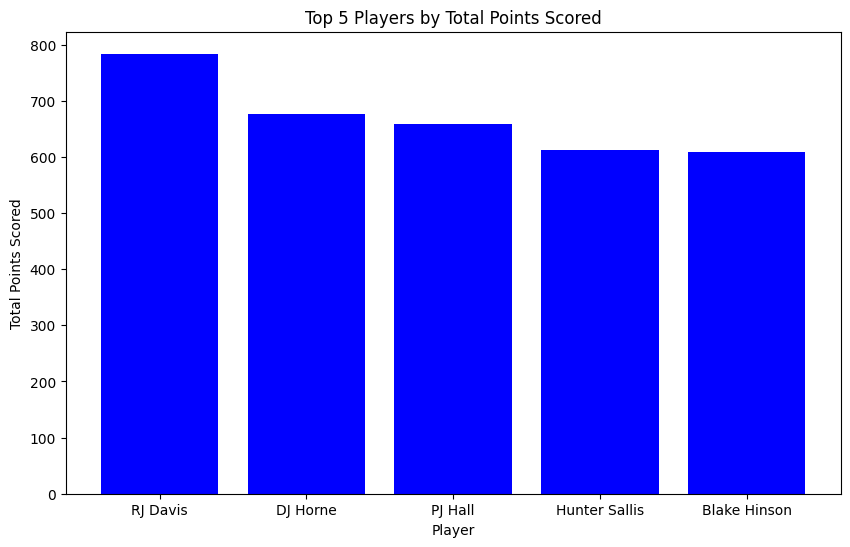

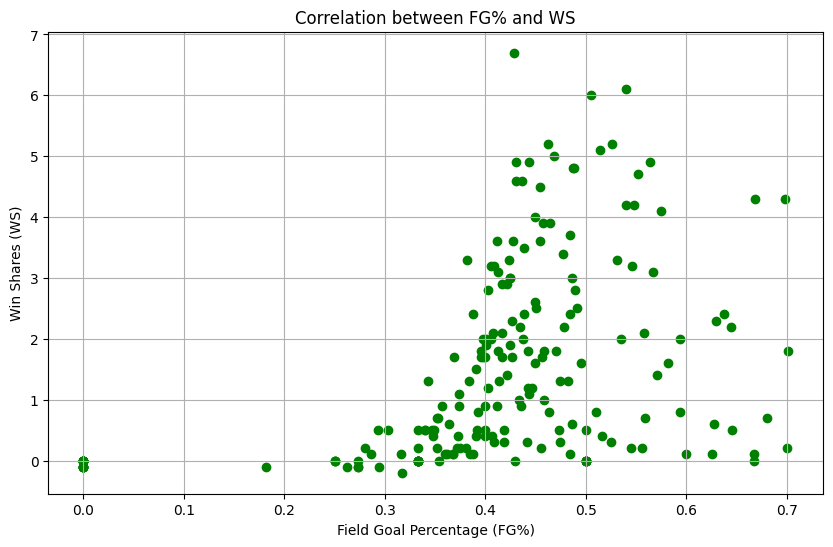

Correlation coefficient between FG% and WS: 0.4210663894199787


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('/content/acc_players-2324F.csv', index_col=False)
df.columns = df.iloc[0]
df = df[1:]
print(df.head())

df.columns = ['Rk', 'Player', 'Class', 'Pos', 'School', 'G', 'MP', 'TRB',
              'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%',
              'PER', 'WS', 'BPM']

print(df.head())


# 2
df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')
df['PTS'] = df['PTS'].fillna(0)
total_points = df['PTS'].sum()
print(f"Total points scored: {total_points}")

most_minutes_player = df.loc[df['MP'].idxmax()]
print(f"Player with most minutes: {most_minutes_player['Player']}")

df['TRB'] = pd.to_numeric(df['TRB'], errors='coerce')
df['TRB'] = df['TRB'].fillna(0)
top_5_rebounds = df.nlargest(5, 'TRB')[['Player', 'TRB']]
print("\nTop 5 players by total rebounds:")
print(top_5_rebounds)


# 3
df['MP'] = pd.to_numeric(df['MP'], errors='coerce')
df['MP'] = df['MP'].fillna(0)
filtered_df = df[df['MP'] > 500]

df['AST'] = pd.to_numeric(df['AST'], errors='coerce')
df['BLK'] = pd.to_numeric(df['BLK'], errors='coerce')

df['AST'] = df['AST'].fillna(0)
df['BLK'] = df['BLK'].fillna(0)

highest_assist_player = filtered_df.loc[filtered_df['AST'].idxmax(), ['Player', 'AST']]
print(f"Player with the highest total assists: {highest_assist_player['Player']} with {highest_assist_player['AST']} assists")

filtered_df = df[df['MP'] > 500]
top_3_assists = filtered_df.nlargest(3, 'AST')[['Player', 'AST']]
print("\nTop 3 Assist Leaders in the League:")
print(top_3_assists)

top_3_blockers = filtered_df.nlargest(3, 'BLK')[['Player', 'BLK']]
print("\nTop 3 Shot Blockers in the League:")
print(top_3_blockers)


# 4
school_points = df.groupby('School')['PTS'].sum()

print("\nTotal points scored by each school:")
print(school_points)

school_assists = df.groupby('School')['AST'].sum()

print("\nTotal assists by each school:")
print(school_assists)

sorted_school_points = school_points.sort_values(ascending=False)

top_3_schools = sorted_school_points.head(3)
print("\nTop 3 schools by total points scored:")
print(top_3_schools)

# BONUS
top_5_players = df.nlargest(5, 'PTS')[['Player', 'PTS']]

plt.figure(figsize=(10,6))
plt.bar(top_5_players['Player'], top_5_players['PTS'], color='blue')
plt.title('Top 5 Players by Total Points Scored')
plt.xlabel('Player')
plt.ylabel('Total Points Scored')
plt.show()

df['FG%'] = pd.to_numeric(df['FG%'], errors='coerce')
df['WS'] = pd.to_numeric(df['WS'], errors='coerce')

df = df.dropna(subset=['FG%', 'WS'])

plt.figure(figsize=(10,6))
plt.scatter(df['FG%'], df['WS'], color='green')
plt.title('Correlation between FG% and WS')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.grid(True)
plt.show()

correlation = df['FG%'].corr(df['WS'])
print(f"Correlation coefficient between FG% and WS: {correlation}")


